## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)
regr= DecisionTreeRegressor(max_depth=8)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [24]:
path = regr.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.39972217e-15, 1.31926121e-05, 1.18733509e-04,
        2.11081794e-04, 3.29815303e-04, 3.29815303e-04, 3.29815303e-04,
        5.32102023e-04, 6.46437995e-04, 7.43183817e-04, 8.44327177e-04,
        8.61917326e-04, 1.31926121e-03, 1.31926121e-03, 1.59630607e-03,
        1.93931398e-03, 1.94283201e-03, 2.54177661e-03, 2.58575198e-03,
        2.58575198e-03, 2.96833773e-03, 3.37730871e-03, 3.44766931e-03,
        3.74010554e-03, 4.76253298e-03, 5.57387863e-03, 6.05892700e-03,
        6.35004398e-03, 7.14379947e-03, 7.39226033e-03, 7.44415128e-03,
        9.04636261e-03, 9.69656992e-03, 1.43667546e-02, 1.48636763e-02,
        1.59630607e-02, 1.61609499e-02, 1.74854881e-02, 1.80123131e-02,
        1.82438120e-02, 1.85795954e-02, 1.90501319e-02, 1.90501319e-02,
        2.11081794e-02, 2.11081794e-02, 2.17733069e-02, 2.20903694e-02,
        2.43500021e-02, 2.64127089e-02, 2.80512627e-02, 3.83189471e-02,
        4.02249026e-02, 4.84828496e-02, 5.56300046

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [33]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs=[]

for ccp_alpha in ccp_alphas:
    clf=DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [26]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

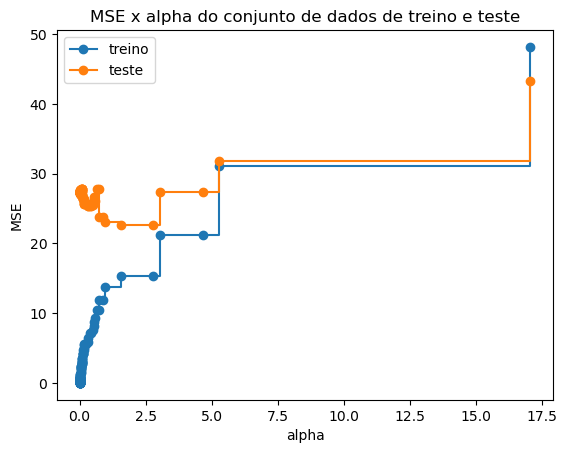

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [30]:
regr2 = DecisionTreeRegressor(ccp_alpha=2.5)
regr2.fit(X_train, y_train)

r2_train = regr2.score(X_train, y_train)
r2_test = regr2.score(X_test, y_test)

print(f"R2: Treino ({r2_train}) Teste ({r2_test})")

R2: Treino (0.8291802039079068) Teste (0.6655106388566641)


### 7. Visualize esta árvore.

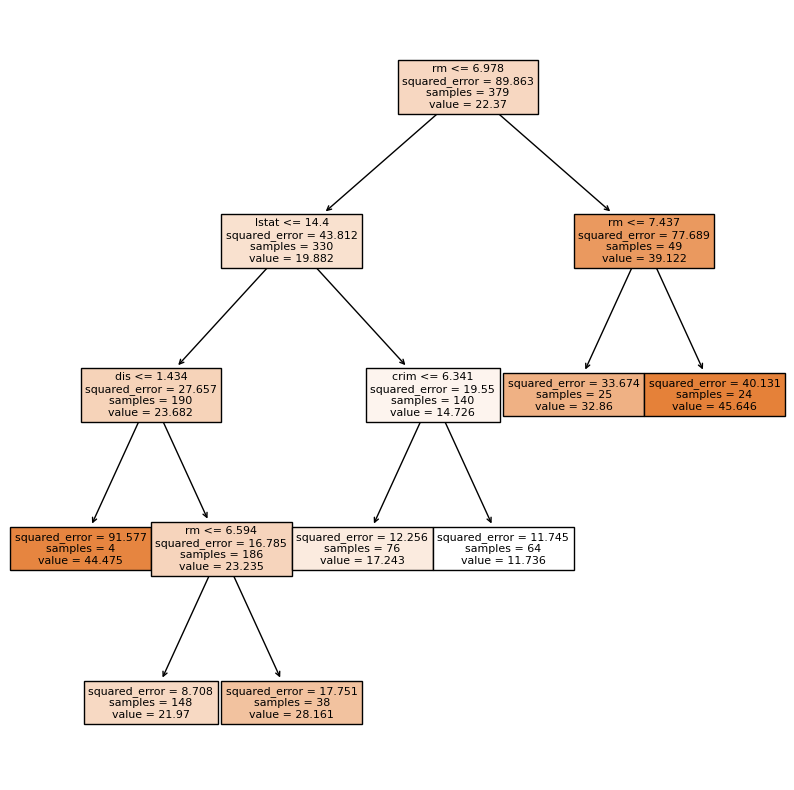

In [31]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr2, 
                    feature_names=list(X.columns),  
                    filled=True) 